In [1]:
import pandas as pd
import numpy as np
import json
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('../scores/robustness_f1_scores.json') as fr:
    mutated_f1_scores = json.load(fr)    

In [3]:
def prepare_df(scores):
    df_train = pd.DataFrame(columns=['Training Accuracy', 'model', 'Mutation Percentage'])
    df_test = pd.DataFrame(columns=['Test Accuracy', 'model', 'Mutation Percentage'])
    for k in scores:
        for model in scores[k]:
            if model == 'singlerf': model_name = 'singleRF'
            elif model == 'hierarchicalrf': model_name = 'hierarchicalRF'
            elif model == 'linearsvm': model_name = 'hierarchicalSVM'
            for score in scores[k][model]['train']:
                df_train.loc[len(df_train)] = [score*100, model_name, str(int(k)/10)]
            for score in scores[k][model]['test']:
                df_test.loc[len(df_test)] = [score*100, model_name, str(int(k)/10)]    
    return df_train, df_test

In [4]:
train, test = prepare_df(mutated_f1_scores)
test['model'] = pd.Categorical(test['model'], ['singleRF', 'hierarchicalRF', 'hierarchicalSVM'])
test = test.sort_values('model')
train['model'] = pd.Categorical(train['model'], ['singleRF', 'hierarchicalRF', 'hierarchicalSVM'])
train = train.sort_values('model')

In [5]:
test['Mutation Percentage'] = pd.to_numeric(test['Mutation Percentage'])

In [6]:
test['Mutation Percentage'] = 100 * test['Mutation Percentage']

In [7]:
test['Mutation Percentage'] = test['Mutation Percentage'].astype('Int32')

In [8]:
def plot_results(accuracies, error_df, y_error, save=False, filename='accuracies'):
    fig = plt.figure(figsize=(15, 10.5))
    plt.plot(accuracies[0][0], marker='o', linestyle='-', color='darkgrey')
    plt.plot(accuracies[0][1], marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)), color='grey')
    plt.plot(accuracies[0][2], marker='s', linestyle=(0, (1, 1)), color='lightgrey')
    sns.boxplot(x='Mutation Percentage', y=y_error, data=error_df, hue='model', palette='Greys_r')
    plt.ylabel('f1 score (%)', fontfamily='serif', fontsize=22)
    plt.xlabel('mutation rate (%)', fontfamily='serif', fontsize=22)
    plt.xticks(fontsize=22, fontfamily='serif')
    plt.yticks(fontsize=22, fontfamily='serif')
    plt.legend(loc='center right', prop={'size': 22, 'family': 'serif'})
    if save:
        plt.savefig(filename+'.svg', bbox_inches='tight')
    plt.show()

In [9]:
def get_accuracy(data):
    mean_accs = {}
    for k in data:
        for model in data[k]:
            mean_accs.setdefault(model+' '+'test', [])
            mean_accs.setdefault(model+' '+'train', [])
            mean_accs[model+' '+'test'].append(statistics.mean(data[k][model]['test'])*100)
            mean_accs[model+' '+'train'].append(statistics.mean(data[k][model]['train'])*100)
    return mean_accs            

In [10]:
acc_scores = get_accuracy(mutated_f1_scores)

In [11]:
acc_list = [[acc_scores['singlerf test'], acc_scores['hierarchicalrf test'], acc_scores['linearsvm test']]]

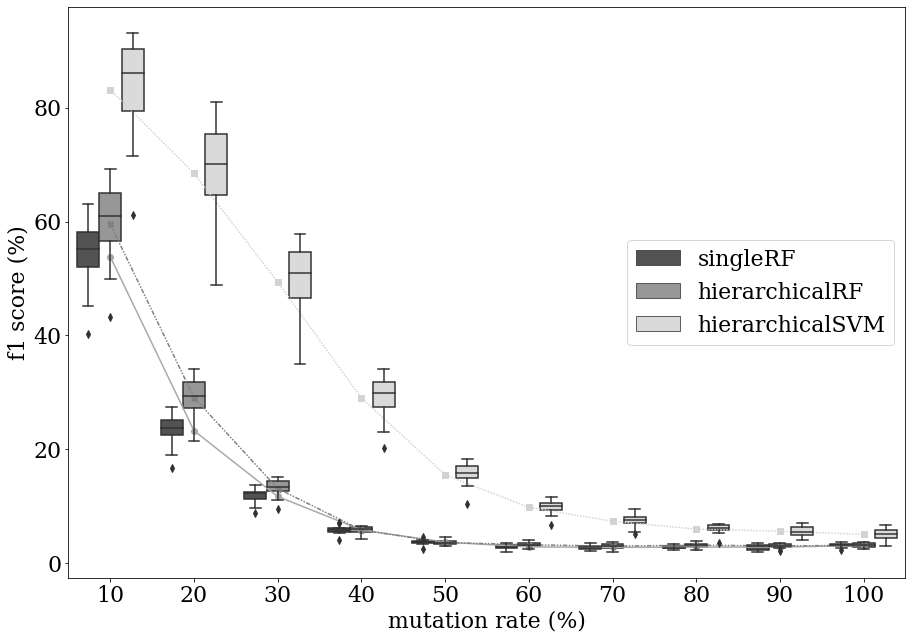

In [12]:
plot_results(acc_list, test, 'Test Accuracy', True, 'mutation_test')